In [1]:
import json
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import re 

height has been deprecated.



In [3]:
master_df = pd.read_csv("C:/Users/mgruz/Desktop/w210/data/nutrient/compiled/nutrition_master_df.csv")

In [24]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.plotly as py
from plotly.graph_objs import *
import plotly
plotly.tools.set_credentials_file(username='mike.gruzynski', api_key='4YcZiB2EUICAxnKEEWFa')
plotly.tools.set_config_file(world_readable=True, sharing='public')
py.sign_in("mike.gruzynski", "4YcZiB2EUICAxnKEEWFa")
%matplotlib inline




In [5]:
master_df.describe()

,Unnamed: 0,10:0 (g),12:0 (g),13:0 (g),14:0 (g),14:0 (g)_x,14:0 (g)_y,14:1 (g),14:1 (g)_x,14:1 (g)_y,15:0 (g),15:1 (g),16:0 (g),16:1 c (g),16:1 t (g),16:1 undifferentiated (g),17:0 (g),17:1 (g),18:0 (g),18:1 c (g),18:1 t (g),18:1 undifferentiated (g),18:1-11 t (18:1t n-7) (g),18:2 CLAs (g),18:2 i (g),"18:2 n-6 c,c (g)",18:2 t not further defined (g),"18:2 t,t (g)",18:2 undifferentiated (g),"18:3 n-3 c,c,c (ALA) (g)","18:3 n-6 c,c,c (g)",18:3 undifferentiated (g),18:4 (g),20:0 (g),20:1 (g),"20:2 n-6 c,c (g)",20:3 n-3 (g),20:3 n-3 (g)_x,20:3 n-3 (g)_y,20:3 n-6 (g),20:3 undifferentiated (g),20:3 undifferentiated (g)_x,20:3 undifferentiated (g)_y,20:4 n-6 (g),20:4 undifferentiated (g),20:5 n-3 (EPA) (g),21:5 (g),22:0 (g),22:1 c (g),22:1 t (g),22:1 undifferentiated (g),22:1 undifferentiated (g)_x,22:1 undifferentiated (g)_y,22:4 (g),22:5 n-3 (DPA) (g),22:6 n-3 (DHA) (g),24:0 (g),24:1 c (g),4:0 (g),6:0 (g),8:0 (g),Alanine (g),Alanine (g)_x,Alanine (g)_y,"Alcohol, ethyl (g)",Arginine (g),Ash (g),Ash (g)_x,Ash (g)_y,Aspartic acid (g),Beta-sitosterol (mg),Betaine (mg),Caffeine (mg),"Calcium, Ca (mg)",Campesterol (mg),"Carbohydrate, by difference (g)","Carotene, alpha (µg)","Carotene, beta (µg)",Cholesterol (mg),"Choline, total (mg)_x","Choline, total (mg)_y","Copper, Cu (mg)","Cryptoxanthin, beta (µg)",Cystine (g),Dihydrophylloquinone (µg),Energy (kJ),Energy (kJ)_x,Energy (kJ)_y,Energy (kcal),"Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)","Fatty acids, total saturated (g)","Fatty acids, total trans (g)","Fatty acids, total trans-monoenoic (g)","Fatty acids, total trans-monoenoic (g)_x","Fatty acids, total trans-monoenoic (g)_y","Fatty acids, total trans-polyenoic (g)","Fiber, total dietary (g)","Fiber, total dietary (g)_x","Fiber, total dietary (g)_y","Fluoride, F (µg)","Folate, DFE (µg)","Folate, DFE (µg)_x","Folate, DFE (µg)_y","Folate, food (µg)","Folate, total (µg)",Folic acid (µg),Fructose (g),Galactose (g),Glucose (dextrose) (g),Glutamic acid (g),Glycine (g),Histidine (g),Hydroxyproline (g),"Iron, Fe (mg)",Isoleucine (g),Lactose (g),Leucine (g),Lutein + zeaxanthin (µg),Lutein + zeaxanthin (µg)_x,Lutein + zeaxanthin (µg)_y,Lycopene (µg),Lysine (g),"Magnesium, Mg (mg)",Maltose (g),"Manganese, Mn (mg)",Menaquinone-4 (µg),Menaquinone-4 (µg)_x,Menaquinone-4 (µg)_y,Methionine (g),Niacin (mg),Pantothenic acid (mg),Phenylalanine (g),"Phosphorus, P (mg)",Phytosterols (mg),"Potassium, K (mg)",Proline (g),Protein (g),Retinol (µg),Riboflavin (mg),"Selenium, Se (µg)",Serine (g)_x,Serine (g)_y,"Sodium, Na (mg)",Starch (g),Stigmasterol (mg),Sucrose (g),"Sugars, total (g)",Theobromine (mg),Thiamin (mg),Threonine (g),"Tocopherol, delta (mg)","Tocopherol, delta (mg)_x","Tocopherol, delta (mg)_y","Tocopherol, gamma (mg)","Tocotrienol, alpha (mg)","Tocotrienol, alpha (mg)_x","Tocotrienol, alpha (mg)_y","Tocotrienol, beta (mg)","Tocotrienol, delta (mg)","Tocotrienol, gamma (mg)",Total lipid (fat) (g),Tryptophan (g),Tyrosine (g),Unnamed: 0.1,Valine (g),"Vitamin A, IU (IU)","Vitamin A, RAE (µg)",Vitamin B-12 (µg),"Vitamin B-12, added (µg)_x","Vitamin B-12, added (µg)_y",Vitamin B-6 (mg),"Vitamin C, total ascorbic acid (mg)",Vitamin D (D2 + D3) (µg),Vitamin D (IU),Vitamin D2 (ergocalciferol) (µg),Vitamin D3 (cholecalciferol) (µg),Vitamin E (alpha-tocopherol) (mg),"Vitamin E, added (mg)",Vitamin K (phylloquinone) (µg),Water (g),Weight(g)
count,7524.000000,4160.000000,6093.000000,41.000000,5903.000000,735.000000,735.000000,1117.000000,1438.000000,1438.000000,1076.000000,2005.000000,4819.000000,1337.000000,1093.000000,4589.000000,2573.000000,1828.000000,6822.000000,1608.000000,742.000000,6800.000000,166.000000,552.00000,2.000000,1810.000000,1176.000000,257.000000,6820.000000,1907.000000,1032.000000,6382.000000,234.000000,2007.000000,1092.000000,2306.000000,744.000000,4.00000,4.00000,1081.000000,710.000000,765.000000,765.000000,153.000000,1185.000000,3755.000000,6.000000,1850.000000,770.000000,756.000000,4283.000000,512.00

In [29]:
# pca_transform_column = ["10:0 (g)", "12:0 (g)", "13:0 (g)", "14:0 (g)", "14:1 (g)", "15:0 (g)", "15:1 (g)", "16:0 (g)", "16:1 c (g)", "16:1 t (g)", "16:1 undifferentiated (g)", "17:0 (g)", "17:1 (g)", "18:0 (g)", "18:1 c (g)", "18:1 t (g)", "18:1 undifferentiated (g)", "18:1-11 t (18:1t n-7) (g)", "18:2 CLAs (g)", "18:2 i (g)", "18:2 n-6 c,c (g)", "18:2 t not further defined (g)", "18:2 t,t (g)", "18:2 undifferentiated (g)", "18:3 n-3 c,c,c (ALA) (g)", "18:3 n-6 c,c,c (g)", "18:3 undifferentiated (g)", "18:4 (g)", "20:0 (g)", "20:1 (g)", "20:2 n-6 c,c (g)", "20:3 n-3 (g)", "20:3 n-6 (g)", "20:3 undifferentiated (g)", "20:4 n-6 (g)", "20:4 undifferentiated (g)", "20:5 n-3 (EPA) (g)", "21:5 (g)", "22:0 (g)", "22:1 c (g)", "22:1 t (g)", "22:1 undifferentiated (g)", "22:4 (g)", "22:5 n-3 (DPA) (g)", "22:6 n-3 (DHA) (g)", "24:0 (g)", "24:1 c (g)", "4:0 (g)", "6:0 (g)", "8:0 (g)", "Alanine (g)", "Alcohol, ethyl (g)", "Arginine (g)", "Ash (g)", "Aspartic acid (g)", "Beta-sitosterol (mg)", "Betaine (mg)", "Caffeine (mg)", "Calcium, Ca (mg)", "Campesterol (mg)", "Carbohydrate, by difference (g)", "Carotene, alpha (µg)", "Carotene, beta (µg)", "Cholesterol (mg)", "Copper, Cu (mg)", "Cryptoxanthin, beta (µg)", "Cystine (g)", "Dihydrophylloquinone (µg)", "Energy (kJ)", "Energy (kcal)", "Fatty acids, total monounsaturated (g)", "Fatty acids, total polyunsaturated (g)", "Fatty acids, total saturated (g)", "Fatty acids, total trans (g)", "Fatty acids, total trans-monoenoic (g)", "Fatty acids, total trans-polyenoic (g)", "Fiber, total dietary (g)", "Fluoride, F (µg)", "Folate, DFE (µg)", "Folate, food (µg)", "Folate, total (µg)", "Folic acid (µg)", "Fructose (g)", "Galactose (g)", "Glucose (dextrose) (g)", "Glutamic acid (g)", "Glycine (g)", "Histidine (g)", "Hydroxyproline (g)", "Iron, Fe (mg)", "Isoleucine (g)", "Lactose (g)", "Leucine (g)", "Lutein + zeaxanthin (µg)", "Lycopene (µg)", "Lysine (g)", "Magnesium, Mg (mg)", "Maltose (g)", "Manganese, Mn (mg)", "Menaquinone-4 (µg)", "Methionine (g)", "Niacin (mg)", "Pantothenic acid (mg)", "Phenylalanine (g)", "Phosphorus, P (mg)", "Phytosterols (mg)", "Potassium, K (mg)", "Proline (g)", "Protein (g)", "Retinol (µg)", "Riboflavin (mg)", "Selenium, Se (µg)", "Sodium, Na (mg)", "Starch (g)", "Stigmasterol (mg)", "Sucrose (g)", "Sugars, total (g)", "Theobromine (mg)", "Thiamin (mg)", "Threonine (g)", "Tocopherol, delta (mg)", "Tocopherol, gamma (mg)", "Tocotrienol, alpha (mg)", "Tocotrienol, beta (mg)", "Tocotrienol, delta (mg)", "Tocotrienol, gamma (mg)", "Total lipid (fat) (g)", "Tryptophan (g)", "Tyrosine (g)", "Valine (g)", "Vitamin A, IU (IU)", "Vitamin A, RAE (µg)", "Vitamin B-12 (µg)", "Vitamin B-6 (mg)", "Vitamin C, total ascorbic acid (mg)", "Vitamin D (D2 + D3) (µg)", "Vitamin D (IU)", "Vitamin D2 (ergocalciferol) (µg)", "Vitamin D3 (cholecalciferol) (µg)", "Vitamin E (alpha-tocopherol) (mg)", "Vitamin E, added (mg)", "Vitamin K (phylloquinone) (µg)", "Water (g)", "Weight(g)"]
pca_transform_column = ["10:0 (g)", "12:0 (g)", "13:0 (g)", "14:0 (g)", "14:1 (g)", "15:0 (g)", "15:1 (g)", "16:0 (g)", "16:1 c (g)", "16:1 t (g)", "16:1 undifferentiated (g)", "17:0 (g)", "17:1 (g)", "18:0 (g)", "18:1 c (g)", "18:1 t (g)", "18:1 undifferentiated (g)", "18:1-11 t (18:1t n-7) (g)", "18:2 CLAs (g)", "18:2 i (g)", "18:2 n-6 c,c (g)", "18:2 t not further defined (g)", "18:2 t,t (g)", "18:2 undifferentiated (g)", "18:3 n-3 c,c,c (ALA) (g)", "18:3 n-6 c,c,c (g)", "18:3 undifferentiated (g)", "18:4 (g)", "20:0 (g)", "20:1 (g)", "20:2 n-6 c,c (g)", "20:3 n-3 (g)", "20:3 n-6 (g)", "20:3 undifferentiated (g)", "20:4 n-6 (g)", "20:4 undifferentiated (g)", "20:5 n-3 (EPA) (g)", "21:5 (g)", "22:0 (g)", "22:1 c (g)", "22:1 t (g)", "22:1 undifferentiated (g)", "22:4 (g)", "22:5 n-3 (DPA) (g)", "22:6 n-3 (DHA) (g)", "24:0 (g)", "24:1 c (g)", "4:0 (g)", "6:0 (g)", "8:0 (g)", "Alanine (g)", "Alcohol, ethyl (g)", "Arginine (g)", "Ash (g)", "Aspartic acid (g)", "Beta-sitosterol (mg)", "Betaine (mg)", "Caffeine (mg)", "Calcium, Ca (mg)", "Campesterol (mg)", "Carbohydrate, by difference (g)", "Carotene, alpha (µg)", "Carotene, beta (µg)", "Cholesterol (mg)", "Copper, Cu (mg)", "Cryptoxanthin, beta (µg)", "Cystine (g)", "Dihydrophylloquinone (µg)", "Energy (kcal)", "Fatty acids, total monounsaturated (g)", "Fatty acids, total polyunsaturated (g)", "Fatty acids, total saturated (g)", "Fatty acids, total trans (g)", "Fatty acids, total trans-monoenoic (g)", "Fatty acids, total trans-polyenoic (g)", "Fiber, total dietary (g)", "Fluoride, F (µg)", "Folate, DFE (µg)", "Folate, food (µg)", "Folate, total (µg)", "Folic acid (µg)", "Fructose (g)", "Galactose (g)", "Glucose (dextrose) (g)", "Glutamic acid (g)", "Glycine (g)", "Histidine (g)", "Hydroxyproline (g)", "Iron, Fe (mg)", "Isoleucine (g)", "Lactose (g)", "Leucine (g)", "Lycopene (µg)", "Lysine (g)", "Magnesium, Mg (mg)", "Maltose (g)", "Manganese, Mn (mg)", "Menaquinone-4 (µg)", "Methionine (g)", "Niacin (mg)", "Pantothenic acid (mg)", "Phenylalanine (g)", "Phosphorus, P (mg)", "Phytosterols (mg)", "Potassium, K (mg)", "Proline (g)", "Protein (g)", "Riboflavin (mg)", "Selenium, Se (µg)", "Sodium, Na (mg)", "Starch (g)", "Stigmasterol (mg)", "Sucrose (g)", "Sugars, total (g)", "Theobromine (mg)", "Thiamin (mg)", "Threonine (g)", "Tocopherol, delta (mg)", "Tocopherol, gamma (mg)", "Tocotrienol, alpha (mg)", "Tocotrienol, beta (mg)", "Tocotrienol, delta (mg)", "Tocotrienol, gamma (mg)", "Total lipid (fat) (g)", "Tryptophan (g)", "Tyrosine (g)", "Valine (g)", "Vitamin B-12 (µg)", "Vitamin B-6 (mg)", "Vitamin C, total ascorbic acid (mg)", "Vitamin D (D2 + D3) (µg)", "Vitamin D2 (ergocalciferol) (µg)", "Vitamin D3 (cholecalciferol) (µg)", "Vitamin E (alpha-tocopherol) (mg)", "Vitamin E, added (mg)", "Vitamin K (phylloquinone) (µg)", "Water (g)", "Weight(g)"]
# pca_transform_column = ["Water (g)", "Energy (kcal)", "Protein (g)", "Total lipid (fat) (g)", "Ash (g)", "Carbohydrate, by difference (g)", "Fiber, total dietary (g)", "Sugars, total (g)", "Sucrose (g)", "Glucose (dextrose) (g)", "Fructose (g)", "Lactose (g)", "Maltose (g)", "Galactose (g)", "Starch (g)", "Calcium, Ca (mg)", "Iron, Fe (mg)", "Magnesium, Mg (mg)", "Phosphorus, P (mg)", "Potassium, K (mg)", "Sodium, Na (mg)", "Copper, Cu (mg)", "Manganese, Mn (mg)", "Selenium, Se (µg)", "Fluoride, F (µg)", "Vitamin C, total ascorbic acid (mg)", "Thiamin (mg)", "Riboflavin (mg)", "Niacin (mg)", "Pantothenic acid (mg)", "Vitamin B-6 (mg)", "Folate, total (µg)", "Folic acid (µg)", "Folate, food (µg)", "Betaine (mg)", "Vitamin B-12 (µg)", "Vitamin A, RAE (µg)", "Retinol (µg)", "Carotene, beta (µg)", "Carotene, alpha (µg)", "Cryptoxanthin, beta (µg)", "Lycopene (µg)", "Lutein + zeaxanthin (µg)", "Vitamin E (alpha-tocopherol) (mg)", "Tocopherol, gamma (mg)", "Tocopherol, delta (mg)", "Tocotrienol, alpha (mg)", "Tocotrienol, beta (mg)", "Tocotrienol, gamma (mg)", "Tocotrienol, delta (mg)", "Vitamin D (D2 + D3) (µg)", "Vitamin D2 (ergocalciferol) (µg)", "Vitamin D3 (cholecalciferol) (µg)", "Vitamin K (phylloquinone) (µg)", "Dihydrophylloquinone (µg)", "Menaquinone-4 (µg)", "Fatty acids, total saturated (g)", "Fatty acids, total monounsaturated (g)", "Fatty acids, total polyunsaturated (g)", "Fatty acids, total trans (g)", "Fatty acids, total trans-monoenoic (g)", "Fatty acids, total trans-polyenoic (g)", "Cholesterol (mg)", "Phytosterols (mg)", "Stigmasterol (mg)", "Campesterol (mg)", "Beta-sitosterol (mg)", "Tryptophan (g)", "Threonine (g)", "Isoleucine (g)", "Leucine (g)", "Lysine (g)", "Methionine (g)", "Cystine (g)", "Phenylalanine (g)", "Tyrosine (g)", "Valine (g)", "Arginine (g)", "Histidine (g)", "Alanine (g)", "Aspartic acid (g)", "Glutamic acid (g)", "Glycine (g)", "Proline (g)", "Hydroxyproline (g)", "Alcohol, ethyl (g)", "Caffeine (mg)", "Theobromine (mg)"]

filtered_df = master_df[pca_transform_column]
filtered_df = filtered_df.fillna(value=0.0)

pca = PCA()
pca_transform = pca.fit_transform(filtered_df)

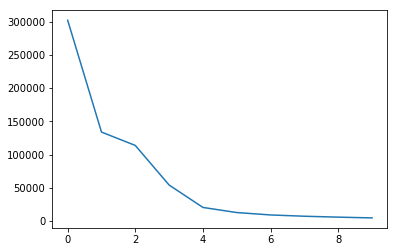

In [30]:
plt.plot(pca.explained_variance_[:10])

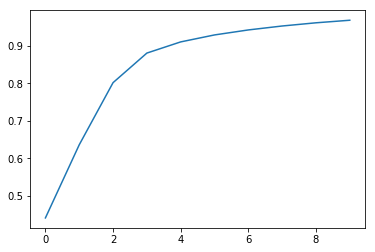

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_[:10]))

In [32]:
pca_method_one = PCA(n_components=3)
pca_transform_3 = pca_method_one.fit_transform(filtered_df)
df_plot = pd.DataFrame(pca_transform_3)
df_plot.columns = ['PCA_1', 'PCA_2', 'PCA_3']
df_plot['Category'] = master_df['Category']
df_plot['Description'] = master_df['Description']

In [33]:
from sklearn.preprocessing import StandardScaler
standar_scaler = StandardScaler()
pca_method_three = PCA(n_components=3)
pca_transform_3 = pca_method_one.fit_transform(standar_scaler.fit_transform(filtered_df))
df_plot_3 = pd.DataFrame(pca_transform_3)
df_plot_3.columns = ['PCA_1', 'PCA_2', 'PCA_3']
df_plot_3['Category'] = master_df['Category']
df_plot_3['Description'] = master_df['Description']
df_plot_3['NDB_NO'] = master_df['NDB_NO']

In [61]:
# df_plot_3_use = df_plot_3[(df_plot_3['Description'].str.contains('chicken')) &
#           (df_plot_3['Description'].str.contains('chicken'))]

df_plot_temp = df_plot_3[df_plot_3['Category'] == 'Lamb_Veal_and_Game_Products']
df_plot_temp.to_csv('test.csv')

# test_df = pd.read_csv('test.csv')


In [60]:
import plotly.plotly as py
import plotly.graph_objs as go

trace_list = []

N = len(test_df['Detail_Group'].unique())
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]
symbol_list = ["circle", "square","circle", "square","circle", "square","circle", "square","circle", "square",
              "circle", "square","circle", "square","circle", "square","circle", "square","circle", "square",
              "circle", "square","circle", "square","circle", "square","circle", "square","circle", "square",
              "circle", "square"]


itr = 0
for category in test_df['Detail_Group'].unique():
    trace1 = go.Scatter3d(
        x=test_df[test_df['Detail_Group'] == category]['PCA_1'],
        y=test_df[test_df['Detail_Group'] == category]['PCA_2'],
        z=test_df[test_df['Detail_Group'] == category]['PCA_3'],
        mode='markers',
        marker=dict(
            size=4,
            color=c[itr],
#             opacity=0.8,
            symbol=symbol_list[itr]
        ),
        name=category,
        text=test_df[test_df['Detail_Group'] == category]['Description']
    )
    itr += 1
    trace_list.append(trace1)

data = trace_list
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
        xaxis=dict(
        range=[-40, 40]
    ),
    yaxis=dict(
        range=[-40, 40]
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

In [26]:
import plotly.plotly as py
import plotly.graph_objs as go

trace_list = []

N = len(df_plot['Category'].unique())
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]
symbol_list = ["circle", "square","circle", "square","circle", "square","circle", "square","circle", "square",
              "circle", "square","circle", "square","circle", "square","circle", "square","circle", "square",
              "circle", "square","circle", "square","circle", "square","circle", "square","circle", "square",
              "circle", "square"]


itr = 0
for category in df_plot_3['Category'].unique():
    trace1 = go.Scatter3d(
        x=df_plot_3[df_plot_3['Category'] == category]['PCA_1'],
        y=df_plot_3[df_plot_3['Category'] == category]['PCA_2'],
        z=df_plot_3[df_plot_3['Category'] == category]['PCA_3'],
        mode='markers',
        marker=dict(
            size=4,
            color=c[itr],
#             opacity=0.8,
            symbol=symbol_list[itr]
        ),
        name=category,
        text=df_plot_3[df_plot_3['Category'] == category]['Description']
    )
    itr += 1
    trace_list.append(trace1)

data = trace_list
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
        xaxis=dict(
        range=[-40, 40]
    ),
    yaxis=dict(
        range=[-40, 40]
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

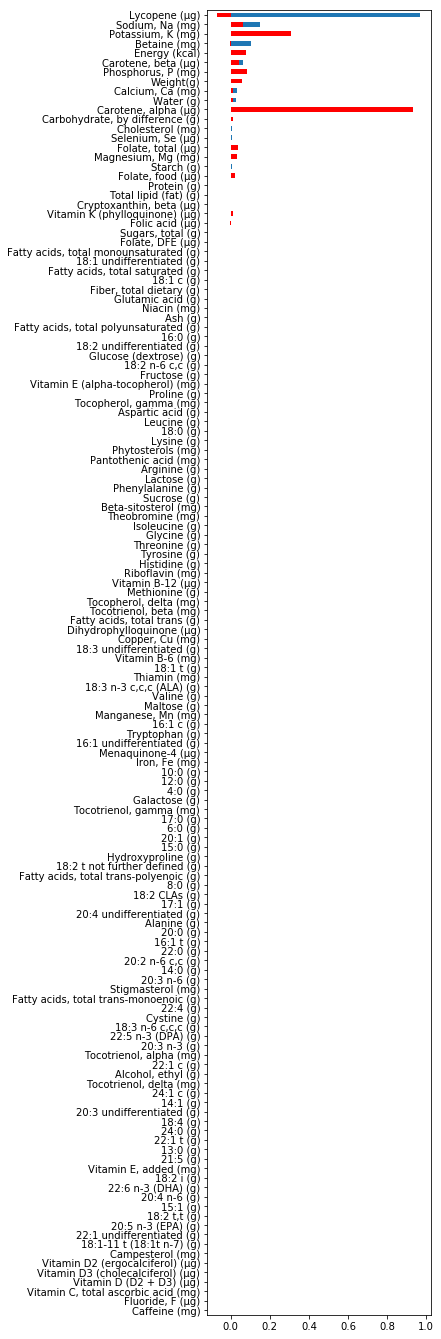

In [20]:
pca_transform_column = ["10:0 (g)", "12:0 (g)", "13:0 (g)", "14:0 (g)", "14:1 (g)", "15:0 (g)", "15:1 (g)", "16:0 (g)", "16:1 c (g)", "16:1 t (g)", "16:1 undifferentiated (g)", "17:0 (g)", "17:1 (g)", "18:0 (g)", "18:1 c (g)", "18:1 t (g)", "18:1 undifferentiated (g)", "18:1-11 t (18:1t n-7) (g)", "18:2 CLAs (g)", "18:2 i (g)", "18:2 n-6 c,c (g)", "18:2 t not further defined (g)", "18:2 t,t (g)", "18:2 undifferentiated (g)", "18:3 n-3 c,c,c (ALA) (g)", "18:3 n-6 c,c,c (g)", "18:3 undifferentiated (g)", "18:4 (g)", "20:0 (g)", "20:1 (g)", "20:2 n-6 c,c (g)", "20:3 n-3 (g)", "20:3 n-6 (g)", "20:3 undifferentiated (g)", "20:4 n-6 (g)", "20:4 undifferentiated (g)", "20:5 n-3 (EPA) (g)", "21:5 (g)", "22:0 (g)", "22:1 c (g)", "22:1 t (g)", "22:1 undifferentiated (g)", "22:4 (g)", "22:5 n-3 (DPA) (g)", "22:6 n-3 (DHA) (g)", "24:0 (g)", "24:1 c (g)", "4:0 (g)", "6:0 (g)", "8:0 (g)", "Alanine (g)", "Alcohol, ethyl (g)", "Arginine (g)", "Ash (g)", "Aspartic acid (g)", "Beta-sitosterol (mg)", "Betaine (mg)", "Caffeine (mg)", "Calcium, Ca (mg)", "Campesterol (mg)", "Carbohydrate, by difference (g)", "Carotene, alpha (µg)", "Carotene, beta (µg)", "Cholesterol (mg)", "Copper, Cu (mg)", "Cryptoxanthin, beta (µg)", "Cystine (g)", "Dihydrophylloquinone (µg)", "Energy (kcal)", "Fatty acids, total monounsaturated (g)", "Fatty acids, total polyunsaturated (g)", "Fatty acids, total saturated (g)", "Fatty acids, total trans (g)", "Fatty acids, total trans-monoenoic (g)", "Fatty acids, total trans-polyenoic (g)", "Fiber, total dietary (g)", "Fluoride, F (µg)", "Folate, DFE (µg)", "Folate, food (µg)", "Folate, total (µg)", "Folic acid (µg)", "Fructose (g)", "Galactose (g)", "Glucose (dextrose) (g)", "Glutamic acid (g)", "Glycine (g)", "Histidine (g)", "Hydroxyproline (g)", "Iron, Fe (mg)", "Isoleucine (g)", "Lactose (g)", "Leucine (g)", "Lycopene (µg)", "Lysine (g)", "Magnesium, Mg (mg)", "Maltose (g)", "Manganese, Mn (mg)", "Menaquinone-4 (µg)", "Methionine (g)", "Niacin (mg)", "Pantothenic acid (mg)", "Phenylalanine (g)", "Phosphorus, P (mg)", "Phytosterols (mg)", "Potassium, K (mg)", "Proline (g)", "Protein (g)", "Riboflavin (mg)", "Selenium, Se (µg)", "Sodium, Na (mg)", "Starch (g)", "Stigmasterol (mg)", "Sucrose (g)", "Sugars, total (g)", "Theobromine (mg)", "Thiamin (mg)", "Threonine (g)", "Tocopherol, delta (mg)", "Tocopherol, gamma (mg)", "Tocotrienol, alpha (mg)", "Tocotrienol, beta (mg)", "Tocotrienol, delta (mg)", "Tocotrienol, gamma (mg)", "Total lipid (fat) (g)", "Tryptophan (g)", "Tyrosine (g)", "Valine (g)", "Vitamin B-12 (µg)", "Vitamin B-6 (mg)", "Vitamin C, total ascorbic acid (mg)", "Vitamin D (D2 + D3) (µg)", "Vitamin D2 (ergocalciferol) (µg)", "Vitamin D3 (cholecalciferol) (µg)", "Vitamin E (alpha-tocopherol) (mg)", "Vitamin E, added (mg)", "Vitamin K (phylloquinone) (µg)", "Water (g)", "Weight(g)"]
filtered_df = master_df[pca_transform_column]
filtered_df = filtered_df.fillna(value=0.0)

pca = PCA()
standar_scaler = StandardScaler()
pca_visualize_variables = PCA(n_components=3)

pca_visualize_variables.fit(filtered_df)


Vt = pca_visualize_variables.components_[:20, :]
M = filtered_df - filtered_df.mean()
U = np.matmul(M, np.transpose(Vt))


comp0 = pd.Series(dict(zip(filtered_df.columns, Vt[0, :])))
comp1 = pd.Series(dict(zip(filtered_df.columns, Vt[1, :])))
col_order = comp0.sort_values().index

plt.figure(figsize=(4, 24))
comp0[col_order].plot(kind='barh')
comp1[col_order].plot(kind='barh', color='red')

In [21]:
check_vals = ["Lutein + zeaxanthin (µg)", "Retinol (µg)", "Vitamin A, RAE (µg)"]
filtered_df = master_df[check_vals]
# filtered_df = filtered_df.fillna(value=0.0)
filtered_df.describe()

,Lutein + zeaxanthin (µg),Retinol (µg),"Vitamin A, RAE (µg)"
count,5202.000000,4106.000000,6555.000000
mean,190.023260,95.269362,80.428223
std,1255.572398,918.962524,738.083929
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,4.000000,3.000000
75%,15.000000,24.000000,22.000000
max,22630.000000,32000.000000,32000.000000
